正在繪製流程圖...


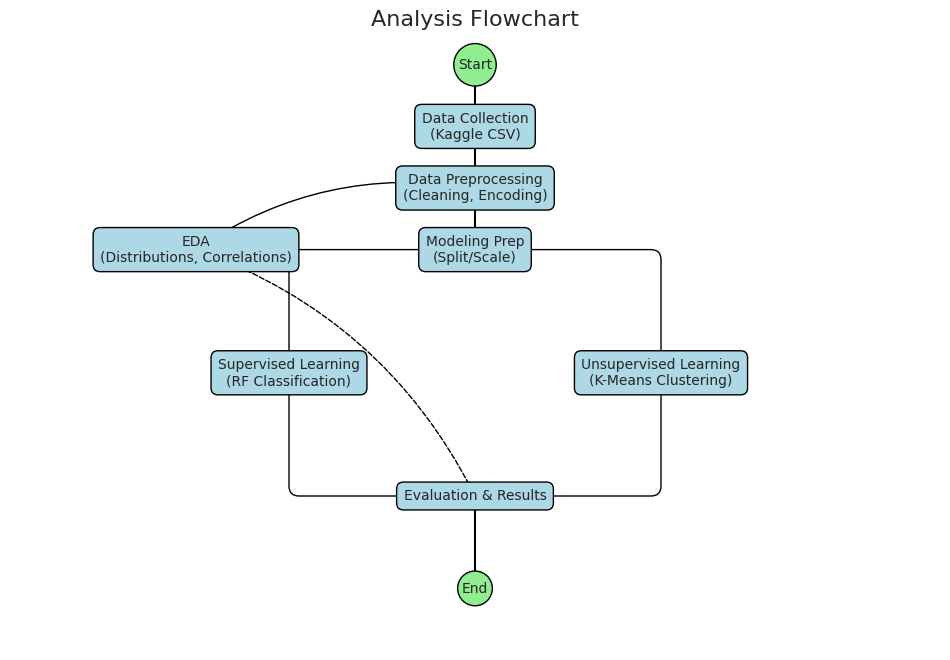


資料載入成功！
資料大小: (20000, 15)

前 5 筆資料:
   student_id  age  gender    course      year parent_education  \
0      200.99   17    male  pharmacy  1st year      high school   
1      200.99   23   other   diploma  2nd year      high school   
2      200.99   22    male      b.sc  3rd year        no formal   
3      200.99   20   other  pharmacy  2nd year        no formal   
4      200.99   20  female  pharmacy  1st year        no formal   

  internet_access hostel_resident class_type weather  study_hours  \
0              no             yes    offline   sunny         3.63   
1             yes             yes    offline  cloudy         4.39   
2             yes             yes     online   rainy         5.43   
3             yes             yes    offline  cloudy         0.21   
4             yes             yes     online   sunny         1.77   

   sleep_hours  travel_time_minutes  attendance absence_reason  
0         7.24                   31           1           none  
1         7.98 

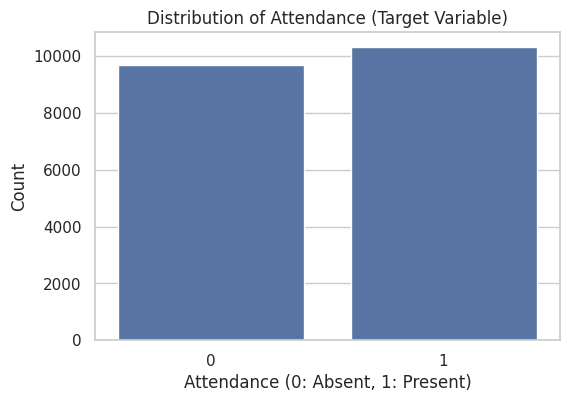

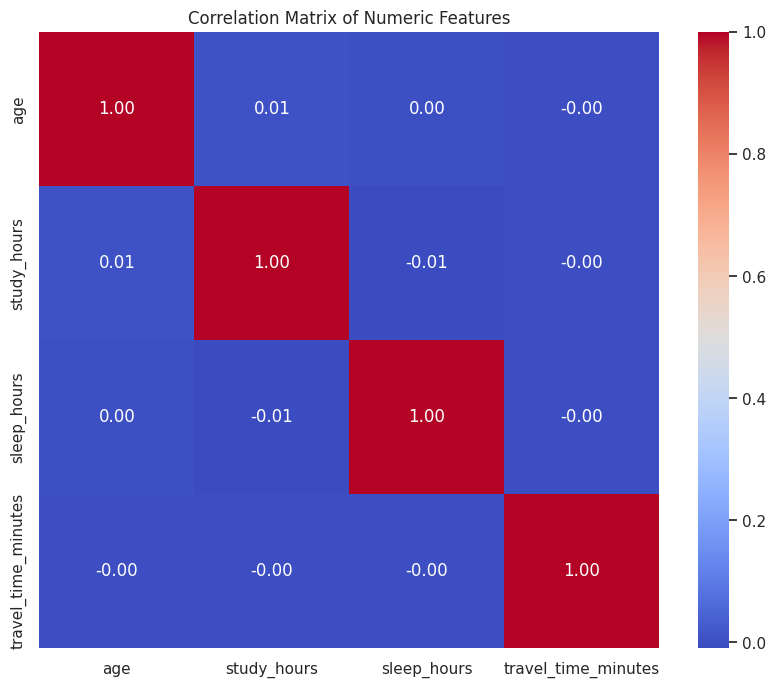


執行監督式學習 (Random Forest)...

模型準確率 (Accuracy): 0.6155

詳細分類報告:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      1946
           1       0.61      0.68      0.64      2054

    accuracy                           0.62      4000
   macro avg       0.62      0.61      0.61      4000
weighted avg       0.62      0.62      0.61      4000



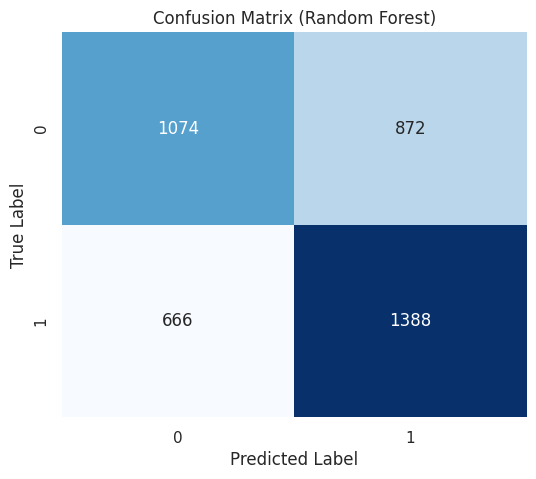


執行非監督式學習 (K-Means Clustering)...


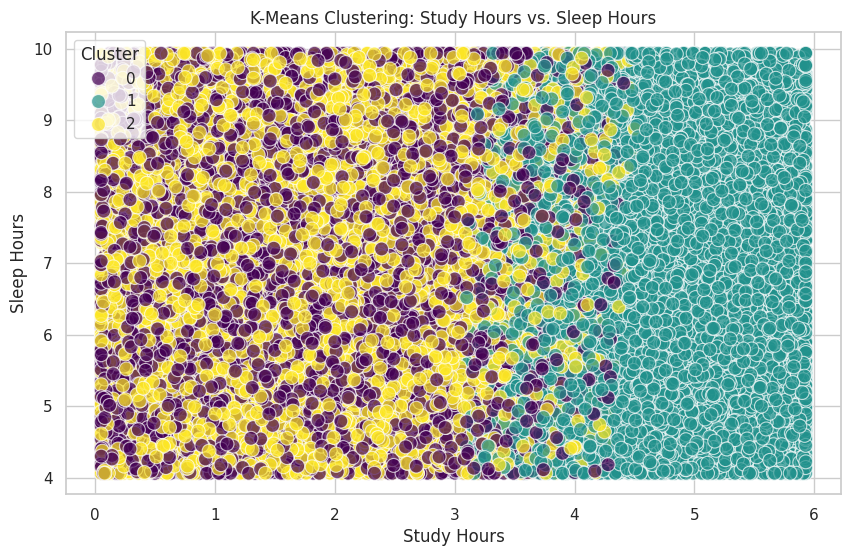


分析完成！


In [3]:
# ==========================================
# 專題：教育數據的問題定義與模型分析
# 環境：Google Colab / Jupyter Notebook
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 設定圖表風格
sns.set(style="whitegrid")

# ==========================================
# 1. 繪製分析流程示意圖 (Flowchart)
# ==========================================
def draw_flowchart():
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('off')

    # 定義流程框的位置與名稱
    boxes = {
        'Start': (0.5, 0.95),
        'Data Collection\n(Kaggle CSV)': (0.5, 0.85),
        'Data Preprocessing\n(Cleaning, Encoding)': (0.5, 0.75),
        'EDA\n(Distributions, Correlations)': (0.2, 0.65),
        'Modeling Prep\n(Split/Scale)': (0.5, 0.65),
        'Supervised Learning\n(RF Classification)': (0.3, 0.45),
        'Unsupervised Learning\n(K-Means Clustering)': (0.7, 0.45),
        'Evaluation & Results': (0.5, 0.25),
        'End': (0.5, 0.1)
    }

    # 繪製方框
    for name, (x, y) in boxes.items():
        if name in ['Start', 'End']:
            box_style = dict(boxstyle="circle,pad=0.3", fc="lightgreen", ec="black")
        else:
            box_style = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="black")

        ax.text(x, y, name, ha='center', va='center', bbox=box_style, fontsize=10, zorder=5)

    # 繪製連接箭頭
    arrow_props = dict(arrowstyle="->", color="black", lw=1.5)

    # 主流程
    ax.annotate("", xy=boxes['Data Collection\n(Kaggle CSV)'], xytext=boxes['Start'], arrowprops=arrow_props)
    ax.annotate("", xy=boxes['Data Preprocessing\n(Cleaning, Encoding)'], xytext=boxes['Data Collection\n(Kaggle CSV)'], arrowprops=arrow_props)

    # 分支到 EDA
    ax.annotate("", xy=boxes['EDA\n(Distributions, Correlations)'], xytext=boxes['Data Preprocessing\n(Cleaning, Encoding)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="black"))

    # 流程到模型準備
    ax.annotate("", xy=boxes['Modeling Prep\n(Split/Scale)'], xytext=boxes['Data Preprocessing\n(Cleaning, Encoding)'], arrowprops=arrow_props)

    # 分支到不同模型
    ax.annotate("", xy=boxes['Supervised Learning\n(RF Classification)'], xytext=boxes['Modeling Prep\n(Split/Scale)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10", color="black"))
    ax.annotate("", xy=boxes['Unsupervised Learning\n(K-Means Clustering)'], xytext=boxes['Modeling Prep\n(Split/Scale)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10", color="black"))

    # 合併到評估
    ax.annotate("", xy=boxes['Evaluation & Results'], xytext=boxes['Supervised Learning\n(RF Classification)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=-90,angleB=180,rad=10", color="black"))
    ax.annotate("", xy=boxes['Evaluation & Results'], xytext=boxes['Unsupervised Learning\n(K-Means Clustering)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=-90,angleB=0,rad=10", color="black"))

    # EDA 到評估的虛線
    ax.annotate("", xy=boxes['Evaluation & Results'], xytext=boxes['EDA\n(Distributions, Correlations)'],
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", color="black", ls='--'))

    # 結束
    ax.annotate("", xy=boxes['End'], xytext=boxes['Evaluation & Results'], arrowprops=arrow_props)

    plt.title("Analysis Flowchart", fontsize=16)
    plt.show()

print("正在繪製流程圖...")
draw_flowchart()


# ==========================================
# 2. 資料載入與初步檢視
# ==========================================
# 讀取資料
try:
    df = pd.read_csv('Attendance_Prediction.csv')
    print("\n資料載入成功！")
    print(f"資料大小: {df.shape}")
except FileNotFoundError:
    print("錯誤：找不到檔案 'Attendance_Prediction.csv'。請確保已上傳檔案。")

# 顯示前幾筆資料
print("\n前 5 筆資料:")
display(df.head()) if 'display' in globals() else print(df.head())


# ==========================================
# 3. 探索式資料分析 (EDA)
# ==========================================
print("\n進行 EDA 分析...")

# (1) 目標變數分佈
plt.figure(figsize=(6, 4))
sns.countplot(x='attendance', data=df)
plt.title('Distribution of Attendance (Target Variable)')
plt.xlabel('Attendance (0: Absent, 1: Present)')
plt.ylabel('Count')
plt.show()

# (2) 數值特徵相關性矩陣
plt.figure(figsize=(10, 8))
# 篩選數值欄位並移除 ID 與 Target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cols_to_corr = [c for c in numeric_cols if c not in ['student_id', 'attendance']]
corr_matrix = df[cols_to_corr].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# ==========================================
# 4. 監督式學習：出勤預測 (Random Forest)
# ==========================================
print("\n執行監督式學習 (Random Forest)...")

# --- 資料預處理 ---
# 移除無用特徵 (student_id) 和 會導致洩漏的特徵 (absence_reason)
X = df.drop(['student_id', 'attendance', 'absence_reason'], axis=1)
y = df['attendance']

# 類別特徵編碼 (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 切分訓練集與測試集 (80% 訓練, 20% 測試)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立與訓練模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# --- 模型評估 ---
acc = accuracy_score(y_test, y_pred)
print(f"\n模型準確率 (Accuracy): {acc:.4f}")
print("\n詳細分類報告:")
print(classification_report(y_test, y_pred))

# 繪製混淆矩陣
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ==========================================
# 5. 非監督式學習：學生分群 (K-Means)
# ==========================================
print("\n執行非監督式學習 (K-Means Clustering)...")

# 選擇用於分群的特徵 (例如：學習時間、睡眠時間、通學時間、年齡)
cluster_features = ['study_hours', 'sleep_hours', 'travel_time_minutes', 'age']
X_cluster = df[cluster_features].copy()

# 特徵標準化 (Standardization) - K-Means 對距離敏感，必須做
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# 建立與訓練模型 (假設分為 3 群)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

# 將分群結果加回原始資料
df['cluster'] = clusters

# --- 分群結果視覺化 ---
plt.figure(figsize=(10, 6))
# 使用 'study_hours' 和 'sleep_hours' 兩個維度來觀察分群
sns.scatterplot(x='study_hours', y='sleep_hours', hue='cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering: Study Hours vs. Sleep Hours')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend(title='Cluster')
plt.show()

print("\n分析完成！")